In [5]:
from pandas import DataFrame, concat

In [7]:
df1 = DataFrame({'A':[1,2,3],
                 'B':[4,5,6],
                 'C':[7,8,9]})
df1.head()

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [9]:
df2 = DataFrame({'A':[10,2,12],
                 'B':[4,5,6],
                 'C':[13,8,15]}, index = [3,1,4])
df2.head()

,A,B,C
3,10,4,13
1,2,5,8
4,12,6,15


In [16]:
result = concat([df1,df2]).drop_duplicates()
result.head(10)

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
3,10,4,13
4,12,6,15


In [27]:
df = DataFrame({'A':[],
                    'B':[]})
#loop
subset = DataFrame({'A':[1],
                    'B':[2]}, index=[0])

df = concat([df,subset]).drop_duplicates()

subset = DataFrame({'A':[3],
                    'B':[4]}, index=[1])

df = concat([df,subset]).drop_duplicates()

subset = DataFrame({'A':[1],
                    'B':[2]}, index=[0])

df = concat([df,subset]).drop_duplicates()

df.head()

,A,B
0,1.0,2.0
1,3.0,4.0


In [1]:
from sklearn.neighbors import NearestNeighbors
from pandas import read_csv

In [17]:
cols = ['pickup_longitude',
       'pickup_latitude',
       'dropoff_longitude',
       'dropoff_latitude']
test_df = read_csv('test.csv', usecols = cols)
print(test_df.shape)
test_df.head()

(9914, 4)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.973320,40.763805,-73.981430,40.743835
1,-73.986862,40.719383,-73.998886,40.739201
2,-73.982524,40.751260,-73.979654,40.746139
3,-73.981160,40.767807,-73.990448,40.751635
4,-73.966046,40.789775,-73.988565,40.744427


In [16]:
test_df_cut = test_df.iloc[0:3,:]
test_df_cut.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.973320,40.763805,-73.981430,40.743835
1,-73.986862,40.719383,-73.998886,40.739201
2,-73.982524,40.751260,-73.979654,40.746139


In [111]:
X = test_df_cut.iloc[:,[0,1,2,3]]
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [112]:
indices

array([[0, 2],
       [1, 2],
       [2, 0]])

In [113]:
distances

array([[0.        , 0.01582912],
       [0.        , 0.03811775],
       [0.        , 0.01582912]])

In [119]:
test_df_cut.pickup_longitude[0]

-73.97332000732422

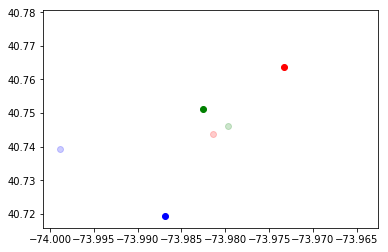

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(test_df_cut.pickup_longitude[0],
            test_df_cut.pickup_latitude[0], c='r', alpha=1)
plt.scatter(test_df_cut.dropoff_longitude[0],
            test_df_cut.dropoff_latitude[0], c='r', alpha=0.2)

plt.scatter(test_df_cut.pickup_longitude[1],
            test_df_cut.pickup_latitude[1], c='b', alpha=1)
plt.scatter(test_df_cut.dropoff_longitude[1],
            test_df_cut.dropoff_latitude[1], c='b', alpha=0.2)

plt.scatter(test_df_cut.pickup_longitude[2],
            test_df_cut.pickup_latitude[2], c='g', alpha=1)
plt.scatter(test_df_cut.dropoff_longitude[2],
            test_df_cut.dropoff_latitude[2], c='g', alpha=0.2)
plt.show()

In [23]:
cols = [
    #'fare_amount',
        'pickup_longitude',
       'pickup_latitude',
       'dropoff_longitude',
       'dropoff_latitude']
train_df = read_csv('train100K.csv', usecols = cols)
print(train_df.shape)
train_df.head()

(100000, 4)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.978989,40.761620,-73.963959,40.770561
1,-73.980350,40.763070,-73.988682,40.753977
2,-74.002282,40.726577,-74.009582,40.723597
3,-73.932800,40.758900,-73.995000,40.736600
4,-73.975421,40.761071,-73.998444,40.724890


In [24]:
combine = concat([test_df.iloc[:1,:],train_df], sort=False)
print(combine.shape)
combine.head()

(100001, 4)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.973320,40.763805,-73.981430,40.743835
0,-73.978989,40.761620,-73.963959,40.770561
1,-73.980350,40.763070,-73.988682,40.753977
2,-74.002282,40.726577,-74.009582,40.723597
3,-73.932800,40.758900,-73.995000,40.736600


In [25]:
#combine2 = combine.drop(combine.iloc[0:9913,:], axis=0)

In [75]:
X = train_df.iloc[:,[0,1,2,3]]

In [76]:
%%time
nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

CPU times: user 30.5 s, sys: 45.9 ms, total: 30.5 s
Wall time: 30.4 s


In [70]:
indices

array([[     0, 103171,  61337],
       [     1,  25760,  48143],
       [     2, 102585,  41966],
       ...,
       [109911,  86994,  99073],
       [109912, 107639,  23816],
       [109913,   6675,  83644]])

In [71]:
distances

array([[0.        , 0.00190174, 0.00213665],
       [0.        , 0.00142811, 0.00162956],
       [0.        , 0.00113894, 0.00226406],
       ...,
       [0.        , 0.00087021, 0.0010877 ],
       [0.        , 0.0014506 , 0.00202323],
       [0.        , 0.00043791, 0.00153093]])

In [3]:
from pandas import read_csv

In [4]:
cols = [
    #'fare_amount',
        'pickup_longitude',
       'pickup_latitude',
       'dropoff_longitude',
       'dropoff_latitude']
train_df = read_csv('train100K.csv', usecols = cols)
print(train_df.shape)
train_df.head()

(100000, 4)


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.978989,40.761620,-73.963959,40.770561
1,-73.980350,40.763070,-73.988682,40.753977
2,-74.002282,40.726577,-74.009582,40.723597
3,-73.932800,40.758900,-73.995000,40.736600
4,-73.975421,40.761071,-73.998444,40.724890


In [5]:
from sklearn.neighbors import BallTree
import numpy as np
import pickle

In [6]:
%%time

X = train_df.iloc[:,:]
tree = BallTree(X, leaf_size=2)
s = pickle.dumps(tree)

CPU times: user 108 ms, sys: 10 ms, total: 118 ms
Wall time: 116 ms


In [7]:
%%time
tree_copy = pickle.loads(s)

CPU times: user 3.28 ms, sys: 2.52 ms, total: 5.8 ms
Wall time: 5.73 ms


In [8]:
del tree

In [15]:
dist, ind = tree_copy.query([[-73.973320,40.763805,-73.981430,40.743835]], k=3)

In [16]:
print(ind)

[[93257 51423 91326]]


In [17]:
print(dist)

[[0.00190198 0.00213672 0.00221252]]


In [36]:
print(tree_copy.query_radius([[-73.973320,40.763805,-73.981430,40.743835]], r=0.003, count_only=True))

[6]


In [37]:
print(tree_copy.query_radius([[-73.973320,40.763805,-73.981430,40.743835]], r=0.003))

[array([52957, 91326, 46768, 33602, 93257, 51423])]


In [38]:
mask = tree_copy.query_radius([[-73.973320,40.763805,-73.981430,40.743835]], r=0.003)

In [39]:
from pandas import Series
mask = list(mask)

In [40]:
type(mask)

list

In [42]:
mask

[array([52957, 91326, 46768, 33602, 93257, 51423])]

In [41]:
train_df.loc[mask]

KeyError: 'None of [[array([52957, 91326, 46768, 33602, 93257, 51423])]] are in the [index]'

In [88]:
train_df.iloc[93257,:]
#train_df.iloc[51423,:]
#train_df.iloc[91326,:]

pickup_longitude    -73.972343
pickup_latitude      40.765325
dropoff_longitude   -73.981906
dropoff_latitude     40.743480
Name: 93257, dtype: float64